In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy, umath

93.7+/-0.9
89.0+/-0.9
0.000974+/-0.000009 -0.16+/-0.07


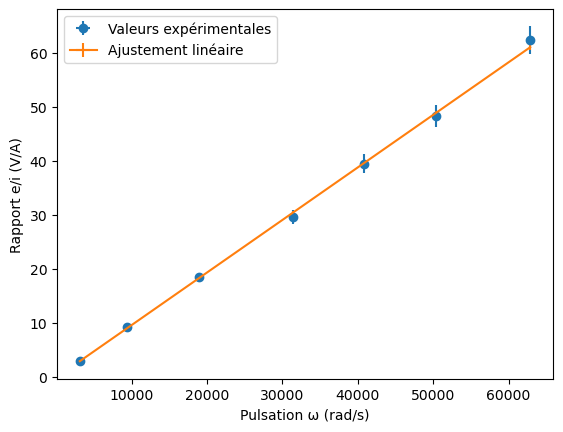

In [7]:
import ldd

df = pd.read_csv("1000spires.csv", sep=";")

nu = unumpy.uarray(df["nu"], 5)
omega = nu * (2 * np.pi)
e = unumpy.uarray(df["U2"], df["U2"] * 0.03)
u1 = unumpy.uarray(df["U1"], df["U1"] * 0.03)
delta_t = unumpy.uarray(df["delta_t"], df["delta_t"] * 0.01)
T = (1 / nu) * 10**6

dephasage = 360 * delta_t / T
i = u1 / 50
e_i = e / i



print(max(dephasage))
print(min(dephasage))

(a, b) = ldd.odr_fit(ldd.linear_function, omega, e_i[0:7], (1, 0))

print(a,b)


ldd.plot_error(omega, e_i, "Valeurs expérimentales", "o")
ldd.plot_error(omega, ldd.linear_function((a, b), omega), label="Ajustement linéaire")
plt.xlabel("Pulsation ω (rad/s)")
plt.ylabel("Rapport e/i (V/A)")
plt.legend()

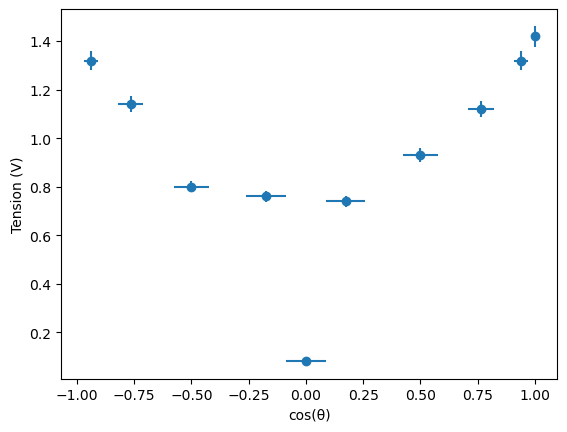

In [ ]:
df = pd.read_csv("angle.csv", sep=";")

theta = df["Angle"]
dtheta = 5
U2 = df["U2"]
dU2 = df["U2"] * 0.03

cosT = np.cos(np.deg2rad(theta))
dcosT = np.sin(np.deg2rad(theta)) * np.deg2rad(dtheta)

plt.errorbar(cosT, U2, dU2, dcosT, fmt="o")
plt.xlabel("cos(θ)")
plt.ylabel("Tension (V)")
plt.savefig("Graph_Angle.png")

In [54]:
amin = ufloat(2, 0.1) * 10**(-2)
amax1 = ufloat(3.6, 0.1) * 10**(-2)
amax2 = ufloat(3.55, 0.1) * 10**(-2)
d = ufloat(13, 0.1) * 10**(-2)
NH = 95
N1 = 1000
N2 = 500

val1 = (4/5)**(3/2) * 2 * 4 * np.pi * 10**(-7) * NH / d * (amin**2 + amax1**2 + amin*amax1) / 3 * N1
val2 = (4/5)**(3/2) * 2 * 4 * np.pi * 10**(-7) * NH / d * (amin**2 + amax2**2 + amin*amax2) / 3 * N2

print(val1 * 10**3)
print(val2 * 10**4)


1.06+/-0.05
5.19+/-0.26


In [26]:
df1 = pd.read_csv("1000spires_alim.csv", sep=";")
df2 = pd.read_csv("500spires_alim.csv", sep=";")

print(df1)

print(df2)

   Level    U1      U2
0   21.4  10.0  0.0192
1   15.4   7.3  0.0154
2    9.7   4.6  0.0104
3    4.6   2.2  0.0056
4   12.4   6.0  0.0124
   Level    U1      U2  Dephasage(miccro s)
0   21.4  10.0  0.0200                  292
1   15.4   7.2  0.0150                  292
2    9.7   4.6  0.0100                  292
3    4.6   2.2  0.0066                  292
4   12.4   5.9  0.0134                  292


0.00183+/-0.00007 0.00165+/-0.00028
0.00171+/-0.00009 0.0027+/-0.0004


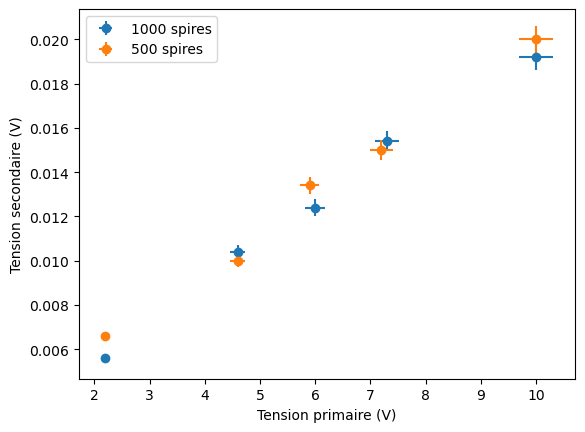

In [60]:
U1 = unumpy.uarray(df1["U1"], df1["U1"] * 0.03)
U2 = unumpy.uarray(df1["U2"], df1["U2"] * 0.03)

U_prim = unumpy.uarray(df2["U1"], df2["U1"] * 0.03)
U_second= unumpy.uarray(df2["U2"], df2["U2"] * 0.03)

ldd.plot_error(U1, U2, "1000 spires", "o")
ldd.plot_error(U_prim, U_second, "500 spires", "o")


plt.xlabel("Tension primaire (V)")
plt.ylabel("Tension secondaire (V)")
plt.legend()

(a1, b1) = ldd.odr_fit(ldd.linear_function, U1, U2, p0=(1,0))
(a2, b2) = ldd.odr_fit(ldd.linear_function, U_prim, U_second, p0=(1,0))

print(a1, b1)
print(a2, b2)

# x1 = unumpy.nominal_values(U1)
# x2 = unumpy.nominal_values(U_prim)

# plt.plot(x1, a1.nominal_value * x1 + b1.nominal_value)
# plt.plot(x2, a2.nominal_value * x2 + b2.nominal_value)
plt.savefig("Graph_3.png")